### Linear regression

***Linear regression*** models the relationship between a dependent variable (often denoted as $y$ and one or more independent variables (often denoted as $x$). It assumes a linear relationship between the independent variables and the dependent variable. The goal of linear regression is to find the best-fitting straight line that describes the relationship between the variables.

Mathematically, a ***simple linear regression*** model can be represented as:

$ y = \beta_0 + \beta_1 x + \varepsilon $

Where:
- $y$ is the dependent variable (the variable we want to predict).
- $x$ is the independent variable (the variable used to make predictions).
- $\beta_0$ is the y-intercept of the line.
- $\beta_1$ is the slope of the line (the change in $y$ for a one-unit change in $x$).
- $\varepsilon$ is the error term, representing the difference between the observed $y$ and the predicted $y$.

In ***multiple linear regression***, there can be more than one independent variable, and the equation becomes:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \varepsilon$

The goal of linear regression is to estimate the values of the coefficients $\beta_0, \beta_1, \ldots, \beta_n$ that minimize the sum of squared differences between the observed and predicted values of $y$. This is typically done using the method of least squares.

The fitted line represents the best estimate of the relationship between the independent and dependent variables based on the given data.

- Si té una x és una recta (2d) &rarr; simple linear regression
- Si té dos x és un pla (3d) &rarr; multiple linear regression
- si té més de una variable dependent &rarr; multiple linear regression

<div>
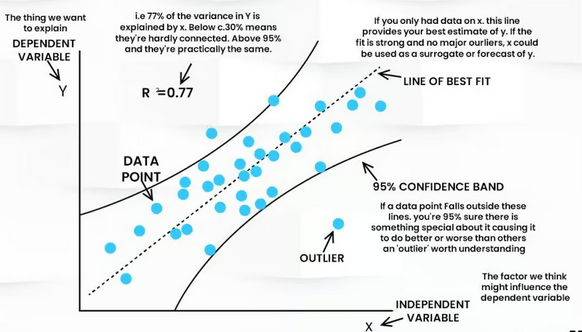
</div>

### Abans d'aplicar el model, hauríem de comprobar que les dades compleixin:

Linear regression ***key assumptions***:

1. **Linearity**: The relationship between the dependent variable and the independent variable(s) is linear. This means that changes in the independent variable(s) result in proportional changes in the dependent variable.

2. **Independence**: The observations or data points used in the regression analysis are independent of each other. In other words, the value of one observation does not depend on the value of another observation.

3. **Normality of Residuals**: The residuals (the differences between the observed and predicted values) are normally distributed. This assumption is important for hypothesis testing and constructing confidence intervals.

- Computem les desviacions de cada punt respecte la suposada recte, i en fem un histograma, donarà una campana de gauss (kernel) centrada a zero, els errors més frequents seràn al voltant del 0 i com més gran siguin, menys probable es que es donin. -0.algo i + 0.algo estàn al mig, per tant és més normal errors petits. Els altres són molt infreqüents. Si això no fos així, no tindría sentit. si estan enganxats, la recta ho descriu molt bé (com la variança) si es petita vol dir que la mitjana és representativa. Les grans desviacions són poc probables. Si no es així no hi ha regressió lineal. 

4. **Homoscedasticity**: Also known as constant variance, it means that the variance of the errors (residuals) is constant across all levels of the independent variable(s). This assumption implies that the spread of the residuals around the regression line remains roughly constant as the values of the independent variable(s) change.

- El contrari de Heterocedasticity, vol dir, la distribució dels residus (la campana de gauss), aquesta campana pot ser més o menys estreta, si es estreta és millor (estàn més junts) no hi han errors grans. La homoscedasticity, diu que la emplada d'aquesta gausseana que representa com es distribueixen els errors és constant per tot el rang de x. Si a baix estan junts però a dalt es separen. si calculessim els histogrames per separat, han de tenir la mateixa separació la campana de gauss. Aquest concepte ha de ser constant, si és hetero, vol dir que no es compleix, no sería constant. 

7. **No Outliers**: Outliers affect the estimates of coefficients and the overall fit of the model. It's important to detect and address such points appropriately.

- Sino, generarà molt de biaix (intentarà millorar per un sol) però anirà pitjor per la resta de la majoría. 

Violations of these assumptions can lead to biased estimates, incorrect standard errors, and unreliable inferences. Therefore, it's crucial to assess these assumptions when performing linear regression analysis and take appropriate steps if any of the assumptions are violated.

Linear regression ***confidence intervals***

The 95% confidence interval bands around the fitted line indicate the range within which we are 95% confident that the true regression line lies. Real datasets often violate the assumptions underlying the regression model (non-linearity, non-constant variance of the residuals, intercation effects, outliers ...). As a consequence  the confidence bands are not parallel to the fitted line.

- El 95% vol dir que la linia estarà a dins de les bandes. és la que hem calculat, però amb un 95% està allà dins.

$y$ i $x$ poden ser valors (univariant) o amb vectors (multivariant)

- univariant: $y = a + bx$

- multivariant: $y = b_0+b_1x1+b_2x_2+···+b_nx_n$

### Univariate Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("../Dades/regression/salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.count()

YearsExperience    30
Salary             30
dtype: int64

In [4]:
len(df['Salary'])

30

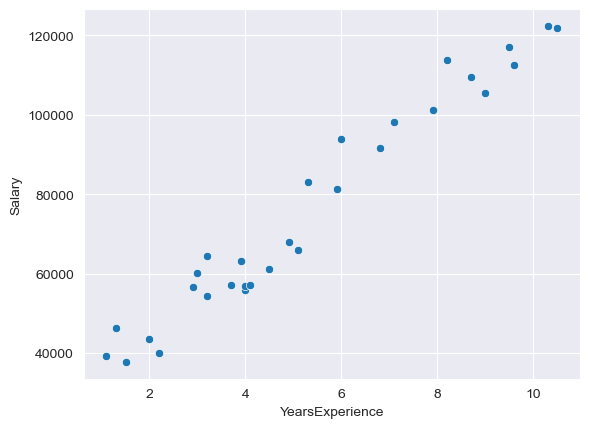

In [5]:
sns.scatterplot(data = df, x = "YearsExperience", y = "Salary");

#### train/test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
Xtrain, Xtest = train_test_split(df, test_size = 0.2, random_state = 385)
Xtrain.shape, Xtest.shape

((24, 2), (6, 2))

#### instantiate linear regression model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

`sklearn` &rarr; vol les dades amb columna. Per això: `.reshape(-1,1)`

In [10]:
# independent/dependent variables (train)
X = Xtrain.YearsExperience.values.reshape(-1, 1)
Y = Xtrain.Salary.values.reshape(-1, 1)

In [11]:
lr.fit(X, Y)

LinearRegression()

#### fitted model
- Blau, dades de test que queden
- Vermell, predicció amb valors entrenats (dades de test)

In [12]:
Xtrain.head()

,YearsExperience,Salary
11,4.0,55794.0
21,7.1,98273.0
26,9.5,116969.0
4,2.2,39891.0
6,3.0,60150.0


In [13]:
# X són els years of experience de X_train (les dades que fem servir per crear la recta)
lr.predict(X)[0:10]

array([[ 62332.92898928],
       [ 92650.99358092],
       [116123.04358736],
       [ 44728.89148445],
       [ 52552.90815327],
       [ 42772.88731725],
       [123947.06025617],
       [ 54508.91232047],
       [ 71134.94774169],
       [ 73090.9519089 ]])

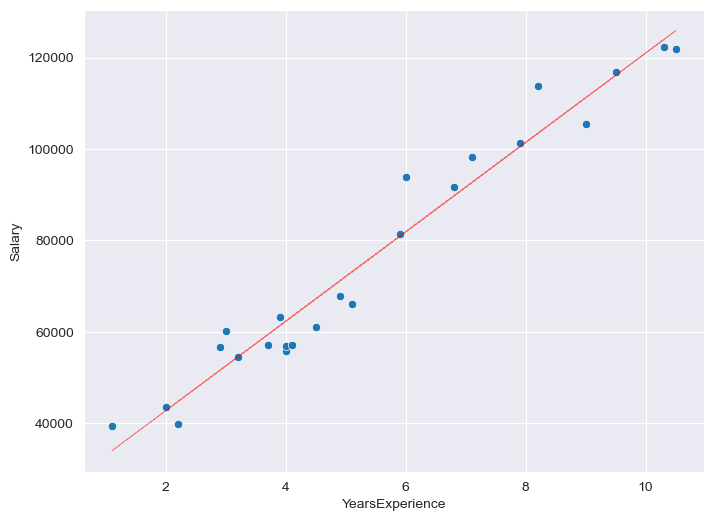

In [14]:
_, axs = plt.subplots(1, 1, figsize = (8, 6))
sns.scatterplot(ax = axs, data = Xtrain, x = 'YearsExperience', y = 'Salary')
axs.plot(Xtrain.YearsExperience.values, lr.predict(X), 'r', linewidth = 0.5, alpha = 0.5);

#### predict test
- Com que només volem predir la Y, nomès passem aquesta variable amb el reshape també. 

In [15]:
Xtest['predict'] = lr.predict(Xtest.YearsExperience.values.reshape(-1, 1))
Xtest

,YearsExperience,Salary,predict
2,1.5,37731.0,37882.876899
1,1.3,46205.0,35926.872732
8,3.2,64445.0,54508.912320
24,8.7,109431.0,108299.026919
27,9.6,112635.0,117101.045671
17,5.3,83088.0,75046.956076


#### Veiem els valors blaus amb reals VS valors prdits amb tronjes VS plot del predict de train (mateix de dalt)
- Tots les punts predits estan a sobre la recta (evidentment).
- Punt blau, és el punt real (del df de test).
- Punt vermell, és el punt predit.

#### OLS &rarr; ordinary least squares
- Nom del metode darrere algorisme que troba la recta. 
- Busquen minimitzar el que hem dit abans.
- Ho fem amb el ols.

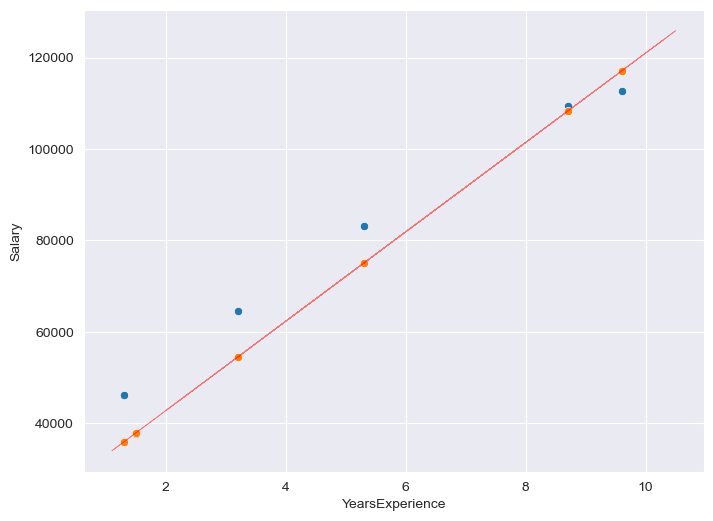

In [16]:
_, axs = plt.subplots(1, 1, figsize = (8, 6))
sns.scatterplot(ax = axs, data = Xtest, x = 'YearsExperience', y = 'Salary')
sns.scatterplot(ax = axs, data = Xtest, x = 'YearsExperience', y = 'predict')
axs.plot(Xtrain.YearsExperience.values, lr.predict(X), 'r', linewidth = 0.5, alpha = 0.5);

#### evaluate model

- No sarveix perque no tenim classes, ni confusion matrix
- es fa amb el `r2_score i mean_squared_error`

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

##### mean squared error

$mse = \sum_{i\in Xtest}^n \frac{\left(y_i - \hat{y}_i\right)^2}{n}$

`Error quadratic mig` &rarr; igual variança
- No respecte una linia recta, respecte la regressió.
- Mateixa formula.
- Nomès que el $\hat{y_i}$ és el valor estimat 
    - Predicció i valor en concret
- Abans posavem a la y una linia recta, perquè era la mitjana 
    - Mitjana de tots els valors

- n: es el número total de observaciones o muestras.
- y_i: son los valores reales de la variable dependiente para la observación i.
- y^i: son las predicciones del modelo para la observación i. 

- El MSE calcula la diferencia al cuadrado entre cada predicción y el valor real, suma esas diferencias al cuadrado y luego toma el promedio. Como se elevan al cuadrado, los errores más grandes contribuyen más significativamente al MSE. 

- Una puntuación de MSE más baja indica un mejor ajuste del modelo a los datos, ya que significa que las predicciones del modelo están más cerca de los valores reales. Es importante tener en cuenta que el MSE puede ser sensible a valores atípicos (outliers) ya que penaliza fuertemente los errores grandes debido al término al cuadrado.

In [18]:
# Calculat a mà:
sum([(y -p)**2 for y, p in zip(Xtest.Salary, Xtest.predict)]) /Xtest.shape[0]

48379019.913757026

In [19]:
# Calculat amb sklearn:
mse = mean_squared_error(Xtest.Salary, Xtest.predict, squared = True) # El parametre elevat al quadrat no serveix massa
print("MSE: %.4f" % mse)

MSE: 48379019.9138


##### root mean squared error

Ens interessa més aquest, sense la arrel perquè ho estem passant a la mateixa escala (l'error de 40.000 no ens indica massa)

- express the error in units of the predicted variable

$rmse = \sqrt{mse}$

In [20]:
# Calculat a mà:
np.sqrt(sum([(y -p)**2 for y, p in zip(Xtest.Salary, Xtest.predict)]) /Xtest.shape[0])

6955.50285125073

#### Significa l'error de la variable independent
    - 6955 està amb les mateixes unitsts (€) que la variable independent (salari), error de 7000€ jaja és molt, tant positiu com negatiu.

In [21]:
# Calculat amb sklearn:
rmse = mean_squared_error(Xtest.Salary, Xtest.predict, squared = False) # Parametre
print("RMSE: %.4f" % rmse)

RMSE: 6955.5029


##### R-squared
$R^2 = 1 - \sum_{i\in Xtest}^n \frac{\left(y_i - \hat{y}_i\right)^2}{\left(y_i - \bar{y}_i\right)^2}$

Aquest relaciona: 
- Si tenim un núvol de punts ascendit cap amut, si calculem la mitjana estarà (una línia recta, horitzontal al eix X).
- La variança d'aquests punts respecte la mitjana, és la suma de totes les desviacions. 
- Qualsevol recta que estimem (fent una regressió respecte els punts). Donarà una altre recta. 
- Ara les desviacions es converteixen en la distancia del punt a aquesta nova recta. 
- Si fem una altre regressió que si ajusta més, tindriem unes altres desviacions. 
- Qualsevol recta que t'imaginis té unes desviacions diferents. 
- El **R-squared** calcula el ratio entre les desviacions respecte la mitjana (variança) i les de la nostre regressió (d'aquí la formula). 
    - Si realment hi ha una relació de linealitat, les de la predicció hauríen de ser més petites que les de la mitjana. 
    - Cocient més petit que el divisor ¿?¿
    - La relació serà més petita què 1
- Si fessim la recta perfecte &rarr; la divisió sería 1 - (0/algo > 0 per força) &rarr; 1 - 0 &rarr; $R^2$ és 1
- És només un cocient perque suposem que la regressió serà millor que la mitjana. 
- Si l'ajust és 0, hem trobat la mitjana.
- Si és negatiu pitjor.

#### Aquest index ($R^2$) com més proper a 1, millor és l'ajust (model) que hem fet.

In [22]:
1 -sum([(y -p)**2 for y, p in zip(Xtest.Salary, Xtest.predict)]) /sum([(y -Xtest.Salary.mean())**2 for y in Xtest.Salary])

0.9418842526313294

In [23]:
rsq = r2_score(Xtest.Salary, Xtest.predict)
print('R-quadrat: %.5f' % rsq)

R-quadrat: 0.94188


#### model summary
- Calculem els parámetres de la recta de regressió:

Aquí: 
- $y = a + bx$
- $y = b_0 + b_1x$

- $R^2$ com de bo es el model.
- $rmse$ Si el nuvol fos més dispert, l'ajust sería pitjor però la magnitud de l'error al mateix nivell.
    - Si tenim alguns punts que se'm en vagin més, fan que el $rmse$ puji, però el $R^2$ seguiria siguent bo. 
    - Si tenim punts més dispersos, podríem seguir tinguent el mateix $rmse$ però l'ajust ($R^2$) sería pitjor.
    - Si les dades són millors, millor ajust, però comparat amb un altre de pitjor, el $rmse$ pot ser el mateix. 

In [24]:
# Coeficient
print('Coeficient \u03B21: %.5f' % lr.coef_)
# Intercept (x = 0)
print('Terme independent \u03B20: %.5f' % lr.intercept_)
# error
X_ = Xtest.YearsExperience.values.reshape(-1, 1)
Y_ = Xtest.Salary.values.reshape(-1, 1)
print("Coeficient de determinació R^2:", lr.score(X_, Y_))

Coeficient β1: 9780.02084
Terme independent β0: 23212.84565
Coeficient de determinació R^2: 0.9418842526313294


C:\Users\jaume\AppData\Local\Temp\ipykernel_13456\4200286619.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Coeficient \u03B21: %.5f' % lr.coef_)
C:\Users\jaume\AppData\Local\Temp\ipykernel_13456\4200286619.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Terme independent \u03B20: %.5f' % lr.intercept_)


In [29]:
Xtest.head(2)

,YearsExperience,Salary,predict
2,1.5,37731.0,37882.876899
1,1.3,46205.0,35926.872732


In [28]:
Xtrain.head(2)

,YearsExperience,Salary
11,4.0,55794.0
21,7.1,98273.0


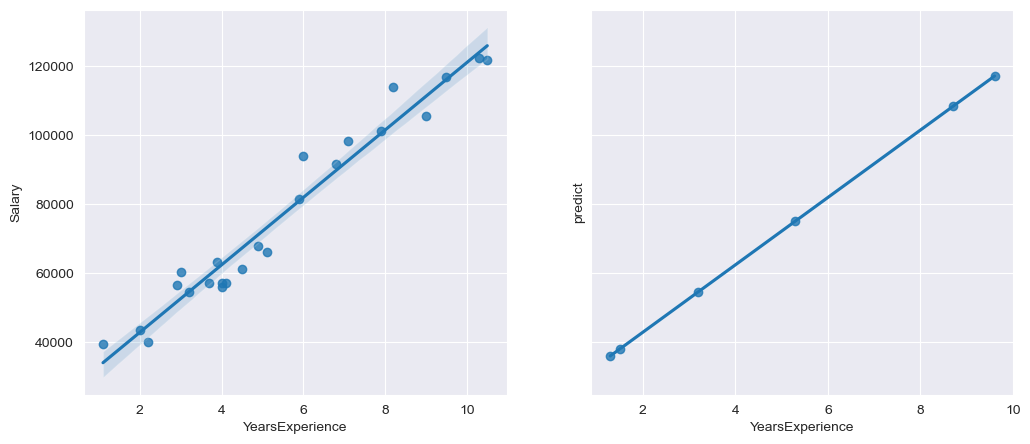

In [31]:
_, axs = plt.subplots(1, 2, figsize = (12, 5), sharey = True)
sns.regplot(ax = axs[0], data = Xtrain, x = 'YearsExperience', y = 'Salary')
sns.regplot(ax = axs[1], data = Xtest, x = 'YearsExperience', y = 'predict');